In [4]:
import netCDF4 as nc
import pylab as plt
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid

In [46]:
#extract data and separate variables
temp_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_temp.nc')
temp = temp_data.variables['temp']

cl_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_cl.nc')
cl = cl_data.variables['cl']

#units kg
mass_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_airmass.nc')
mass = mass_data.variables['airmass_atm']
#print(mass)

press_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_p.nc')
press = press_data.variables['p']
#print(press)

lat_t = temp_data.variables['latitude'][:]
lon_t = temp_data.variables['longitude'][:]

lat_cl = temp_data.variables['latitude'][:]
lon_cl = temp_data.variables['longitude'][:]

temp, lon_t = shiftgrid(180.,temp,lon_t,start=False)
cl, lon_cl = shiftgrid(180.,cl,lon_cl,start=False)

<class 'netCDF4._netCDF4.Variable'>
float32 p(time, model_level_number, latitude, longitude)
    long_name: p
    units: Pa
    um_stash_source: m01s00i408
    cell_methods: time: mean (interval: 1 hour)
    grid_mapping: latitude_longitude
    coordinates: forecast_period forecast_reference_time level_height sigma
unlimited dimensions: time
current shape = (132, 60, 73, 96)
filling on, default _FillValue of 9.969209968386869e+36 used



/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


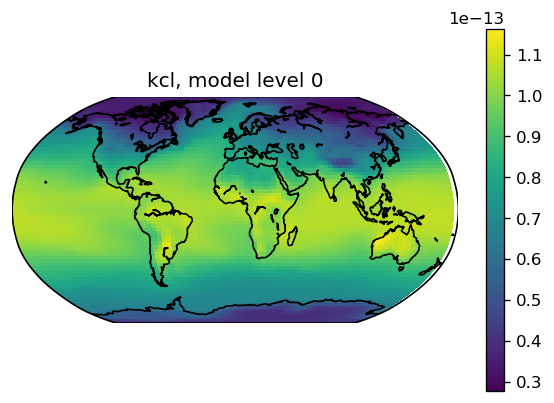

In [36]:
#make world map plot temp level 0
plt.figure(dpi=120)
map = Basemap(projection='robin', lon_0=0.)
map.drawcoastlines()

lonx,laty = np.meshgrid(lon_t,lat_t)
x,y=map(lonx,laty)

#rate constant in molec cm-3
kcl = 6.6e-12*np.exp(-1240/temp)

cs = map.pcolormesh(x,y,kcl[0,0,:,:])

plt.title('kcl, model level 0')
plt.colorbar()
plt.show()


Text(0.5, 1.0, 'Rate constant / molec cm-3 s-1')

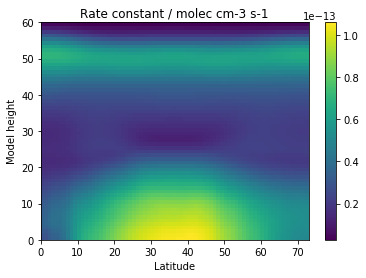

In [37]:
plt.pcolormesh(np.mean(kcl, axis=(0,3)))
#average over axes 0:time and 3:longitude to get zonal mean
plt.colorbar()

plt.xlabel('Latitude')
plt.ylabel('Model height')
plt.title('Rate constant / molec cm-3 s-1')

In [57]:
n_a = 6.02e23
k_b = 1.38e23

#Convert Cl into no. molecules per box
cl_kg = np.multiply(cl,mass[:120,:,:,:])
conv_1 = 1000/35.5*(n_a)
cl_molec = np.multiply(cl_kg,conv)

#calculate Nk
conv_2 = 1000/28.8*(n_a)*k_b
nk_box = np.multiply(mass,conv_2)

inv_vol = np.divide(press,(np.multiply(nk_box,temp)))

cl_conc = np.multiply(cl_molec,inv_vol[:120,:,:,:])*10e6

/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


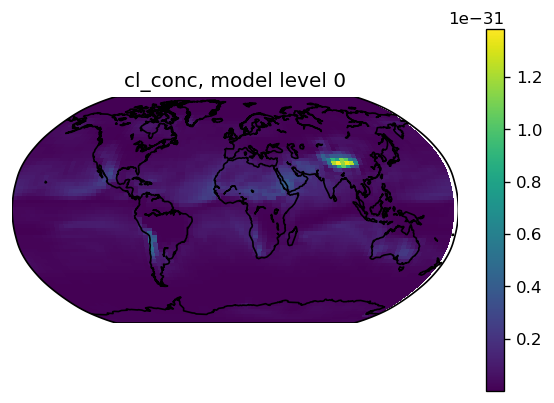

In [58]:
#make world map plot cl level 0
plt.figure(dpi=120)
map = Basemap(projection='robin', lon_0=0.)
map.drawcoastlines()

lonx,laty = np.meshgrid(lon_cl,lat_cl)
x,y=map(lonx,laty)

cl_plot = map.pcolormesh(x,y,cl_conc[0,0,:,:])

plt.title('cl_conc, model level 0')
plt.colorbar()
plt.show()

In [22]:
kcl_1 = np.multiply(kcl[:120,:,:,:],cl_molec)
#cl_kg = kcl*mass
#print(kcl_kg)

In [2]:
vol_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_)

SyntaxError: EOL while scanning string literal (<ipython-input-2-e7332e72cf96>, line 1)